## Plan of work <a id = "plan"> </a>

[1. Downloading and preparing data](#1.)<br>
[2. Train models](#2.)<br>
[2.1. Logistic regression](#2.1.)<br>
[2.2. Catboost](#2.2.)<br>
[3. Final testing](#3.)<br>
[3.1. Logistic regression](#3.1.)<br>
[3.2. Catboost](#3.2.)<br>

In [19]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

# import contractions
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from catboost import CatBoostClassifier

# 1. Downloading and preparing data <a id = "1."> </a>

[Back to plan](#plan)

In [20]:
df = pd.read_csv("./Data/train.csv")

In [21]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, stratify=df["target"], test_size=0.20, random_state=42)

In [22]:
#  The Function for text preprocessing
def tokenize_string(text):

    # Before lemmatizing replace all constructions with normal words
#     text_upd = contractions.fix(text)

    # Tokenize the data and use only lower letters
    words = word_tokenize(text.lower())
    
    # Create a lemmatizer object
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(word, pos = "v") for word in words] 
    
    # # Get rid of punctuation
    words = [word for word in lemmas if word not in string.punctuation]
    
    # Remove stop words
    # Stop words corpus (179 in total)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    return words

In [23]:
# Tokenizing the series for test data
print('I have just started updatind test_df')
test_df['Preprocessed_text'] = test_df.question_text.apply(tokenize_string)

# Tokenizing the series for train data
print('I have just started updatind train_df')
train_df['Preprocessed_text'] = train_df.question_text.apply(tokenize_string)

I have just started updatind test_df
I have just started updatind train_df


In [24]:
train_df['text'] = train_df.Preprocessed_text.apply(lambda x: ' '.join(x))
test_df['text'] = test_df.Preprocessed_text.apply(lambda x: ' '.join(x))

In [25]:
test_df.head()

,qid,question_text,target,Preprocessed_text,text
1259533,f6d4ae6c27dc03f7e3b9,What do people do on Christmas Eve?,0,"[people, christmas, eve]",people christmas eve
557406,6d3687e5923b474c4edf,Which clinical speciality should I take after ...,0,"[clinical, speciality, take, mbbs, want, enjoy...",clinical speciality take mbbs want enjoy life ...
942634,b8bb9706e86a4e3551b6,Why it is important to distinguish language “p...,0,"[important, distinguish, language, “, proficie...",important distinguish language “ proficiency “...
392061,4ccbd7e266abc4995676,What are there too many scam?,0,"[many, scam]",many scam
1044447,cca84d630713c16d950e,I don’t get enough sleep at night. How can I s...,0,"[’, get, enough, sleep, night, stay, awake, cl...",’ get enough sleep night stay awake class


In [26]:
# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

In [27]:
# Vectorize the sentences
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])

y_train = train_df.target.values
y_test = test_df.target.values

# 2. Train models <a id = "2."> </a>

[Back to plan](#plan)

## 2.1. Logistic regression <a id = "2.1."> </a>

[Back to plan](#plan)

In [55]:
# Train a logistic regression model on the vectorized data
model_logreg = LogisticRegression(
    random_state=42, 
    solver='liblinear',
)
model_logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [56]:
# Make a prediction on new data
y_pred_logreg = model_logreg.predict(X_test)

## 2.2. Catboost<a id = "2.2."> </a>

[Back to plan](#plan)

In [50]:
model_ctb = CatBoostClassifier(
    iterations=10000, 
    learning_rate=0.1, 
    depth=6, 
    loss_function='CrossEntropy', 
    random_seed=42,
)
model_ctb.fit(X_train, y_train, verbose=10, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5778101	total: 984ms	remaining: 2h 44m 2s
10:	learn: 0.2291138	total: 9.72s	remaining: 2h 27m 4s
20:	learn: 0.1972249	total: 17.9s	remaining: 2h 21m 26s
30:	learn: 0.1886498	total: 25.6s	remaining: 2h 17m 22s
40:	learn: 0.1836459	total: 33.5s	remaining: 2h 15m 28s
50:	learn: 0.1800231	total: 40.9s	remaining: 2h 13m 6s
60:	learn: 0.1769496	total: 48.2s	remaining: 2h 10m 56s
70:	learn: 0.1744651	total: 55.2s	remaining: 2h 8m 33s
80:	learn: 0.1720634	total: 1m 2s	remaining: 2h 6m 58s
90:	learn: 0.1701327	total: 1m 9s	remaining: 2h 5m 41s
100:	learn: 0.1684815	total: 1m 16s	remaining: 2h 4m 19s
110:	learn: 0.1668486	total: 1m 22s	remaining: 2h 3m 11s
120:	learn: 0.1654036	total: 1m 29s	remaining: 2h 2m 15s
130:	learn: 0.1640337	total: 1m 36s	remaining: 2h 1m 39s
140:	learn: 0.1627379	total: 1m 43s	remaining: 2h 47s
150:	learn: 0.1615442	total: 1m 52s	remaining: 2h 2m 6s
160:	learn: 0.1604310	total: 2m	remaining: 2h 2m 42s
170:	learn: 0.1594737	total: 2m 8s	remaining: 2h 2m 55s


In [51]:
y_pred_ctb = model_ctb.predict(X_test)

# 3. Final testing <a id = "3."> </a>

[Back to plan](#plan)

In [33]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, precision_recall_curve, accuracy_score, balanced_accuracy_score
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def conf_matrix(target, predicted):
    cm = confusion_matrix(y_target=target, 
                          y_predicted=predicted)
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10, 10), 
                                    show_absolute=True, show_normed=True, colorbar=True)
    plt.show()

def eval_predictions(model, features_train, target_train, features_valid, target_valid):
    '''
    Функция принимает в качестве аргументов: модель, признаки и целевой признак выборки для обучения и тестирования.
    Функция обучает заданную модель по обучающей выборке и расчитывает метрики по тестовой выборке: F1-меру, коэффициент Мэтьюса.
    '''
    predictions = model.predict(features_valid)
    print('F1-мера для класса (1): {:.2f}'. format(f1_score(target_valid, predictions)))
    print('Коэффициент Мэтьюса: {:.2f}'. format(matthews_corrcoef(target_valid, predictions)))
    print('Accuracy: {:.2f}'. format(accuracy_score(target_valid, predictions)))
    print('Balanced accuracy: {:.2f}'. format(balanced_accuracy_score(target_valid, predictions)))
    print(classification_report(target_valid, predictions, labels=[0,1]))
    roc(model, features_valid, target_valid)
    conf_matrix(target_valid, predictions)
    return model

def roc(model, features_valid, target_valid):
    '''
    Функция принимает в качестве аргументов: модель, признаки и целевой признак для тестирования.
    Функция строит ROC-кривую модели, ROC-кривую случайной модели модели и высчитывает AUC-ROC.
    '''
    #расчитываем fpr и tpr
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_one_valid)
    fig, ax = plt.subplots(1, 2, figsize = (15,10))
    
    # ROC-кривая нашей модели
    ax[0].plot(fpr, tpr, linestyle='-')
    # ROC-кривая случайной модели
    ax[0].plot([0, 1], [0, 1], linestyle='--')
    ax[0].set_xlim(0,1)
    ax[0].set_ylim(0,1)
    ax[0].set_xlabel('False Positive Rate') 
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title('ROC-кривая')
    
    # PR-кривая нашей модели
    ax[1].plot(recall, precision)
    ax[1].set_xlim(0,1)
    ax[1].set_ylim(0,1)
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('PR-кривая')
    
    plt.show()
    # вычисляем AUROC
    print('AUROC: {:.2f}'.format(roc_auc_score(target_valid, probabilities_one_valid)))
    # вычисляем AUPRC
    print ('AUPRC: {:.2f}'.format(average_precision_score(target_valid, probabilities_one_valid)))

## 3.1. Logistic regression <a id = "3.1."> </a>

[Back to plan](#plan)

F1-мера для класса (1): 0.49
Коэффициент Мэтьюса: 0.49
Accuracy: 0.95
Balanced accuracy: 0.68
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    245063
           1       0.69      0.38      0.49     16162

    accuracy                           0.95    261225
   macro avg       0.82      0.68      0.73    261225
weighted avg       0.94      0.95      0.94    261225



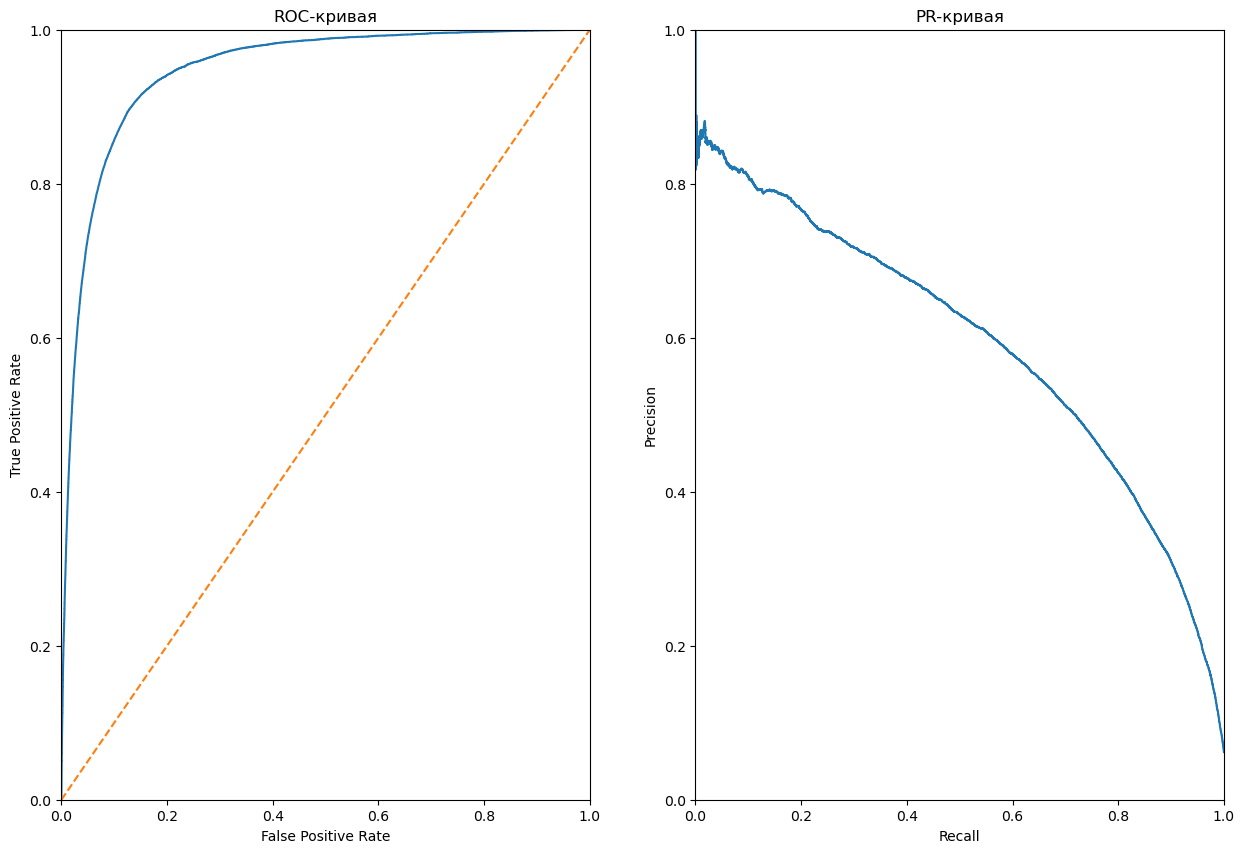

AUROC: 0.95
AUPRC: 0.59


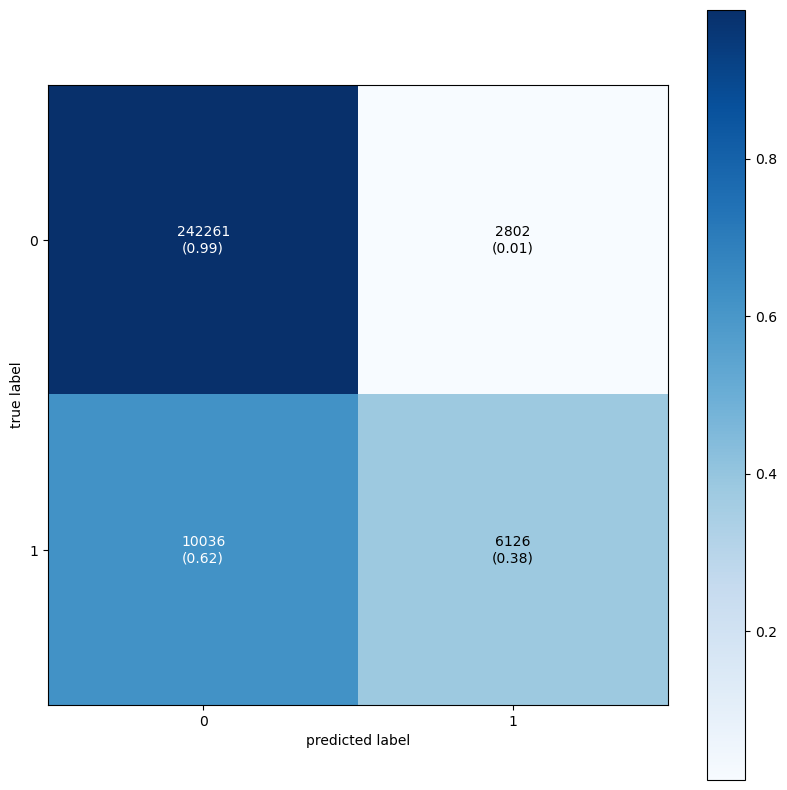

LogisticRegression(random_state=42, solver='liblinear')

In [57]:
eval_predictions(model_logreg, X_train, y_train, X_test, y_test)

## 3.2. Catboost<a id = "3.2."> </a>

[Back to plan](#plan)

F1-мера для класса (1): 0.54
Коэффициент Мэтьюса: 0.53
Accuracy: 0.95
Balanced accuracy: 0.71
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    245063
           1       0.70      0.44      0.54     16162

    accuracy                           0.95    261225
   macro avg       0.83      0.71      0.76    261225
weighted avg       0.95      0.95      0.95    261225



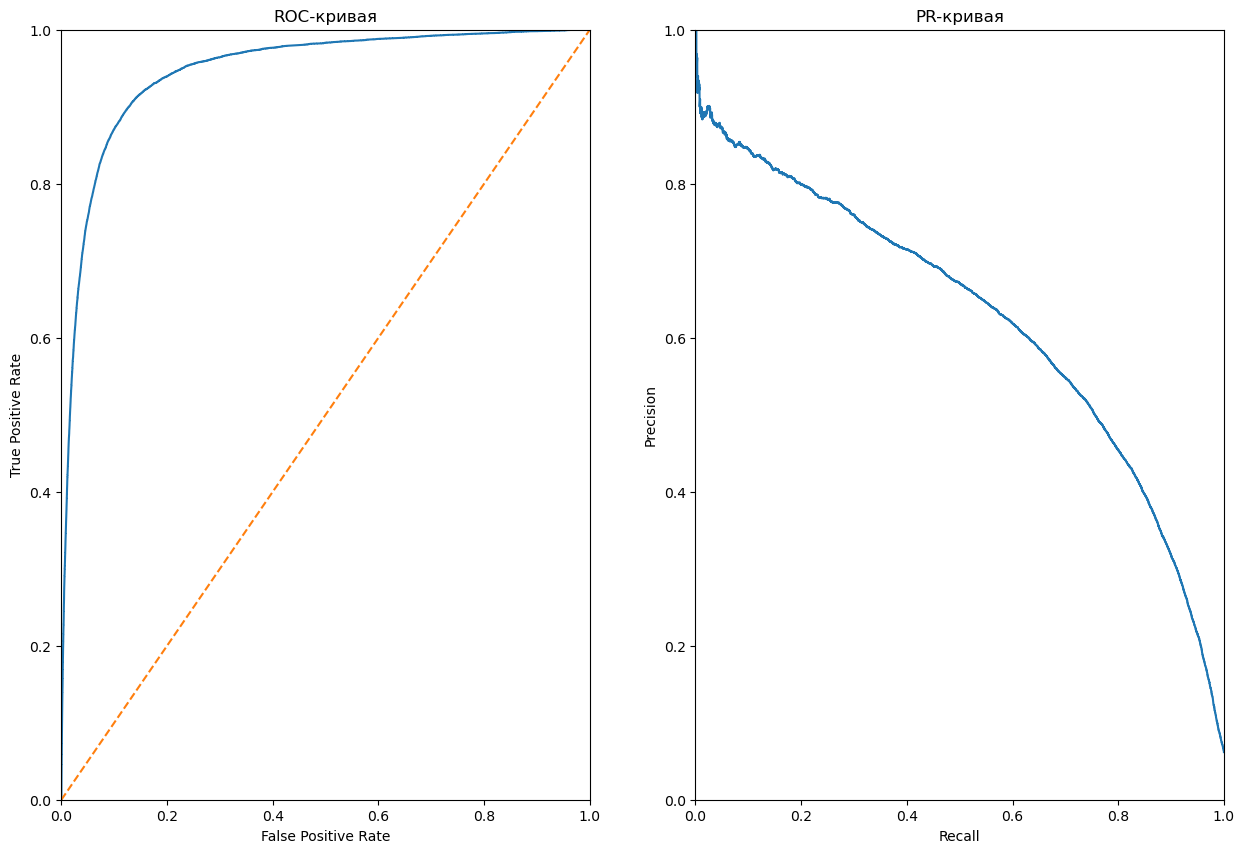

AUROC: 0.95
AUPRC: 0.62


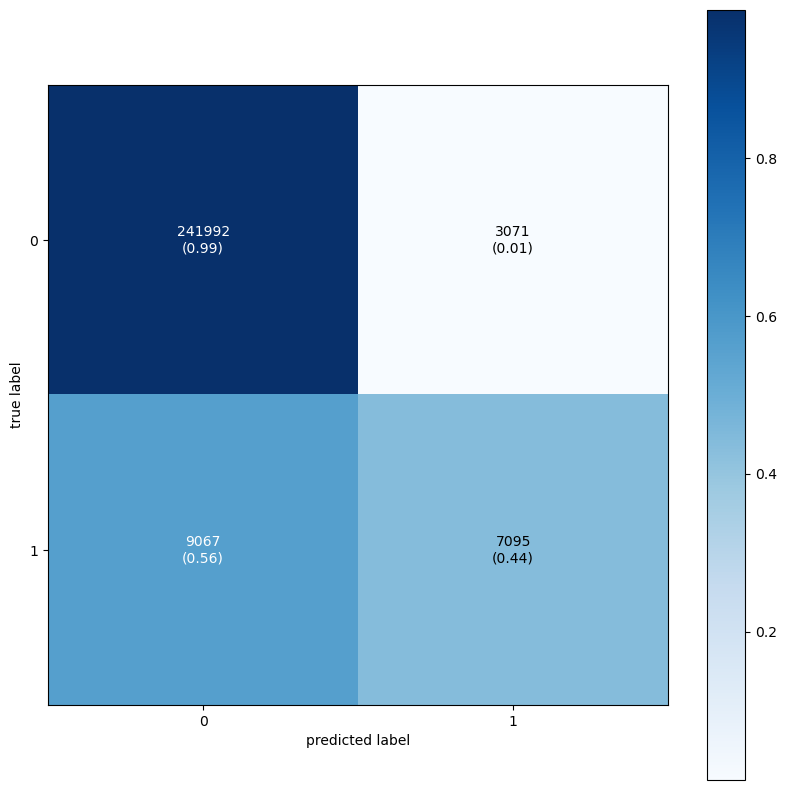

In [52]:
eval_predictions(model_ctb, X_train, y_train, X_test, y_test)